In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [4]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [6]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [7]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']

In [9]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [11]:
ss = StandardScaler()
ss.fit(train_input)
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [12]:
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [14]:
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [17]:
# 결정 트리
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


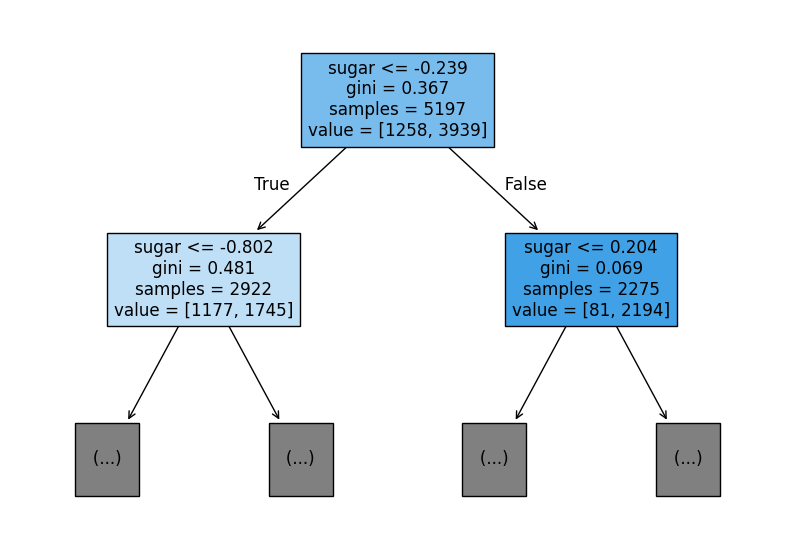

In [18]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [19]:
# 가지치기
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [20]:
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


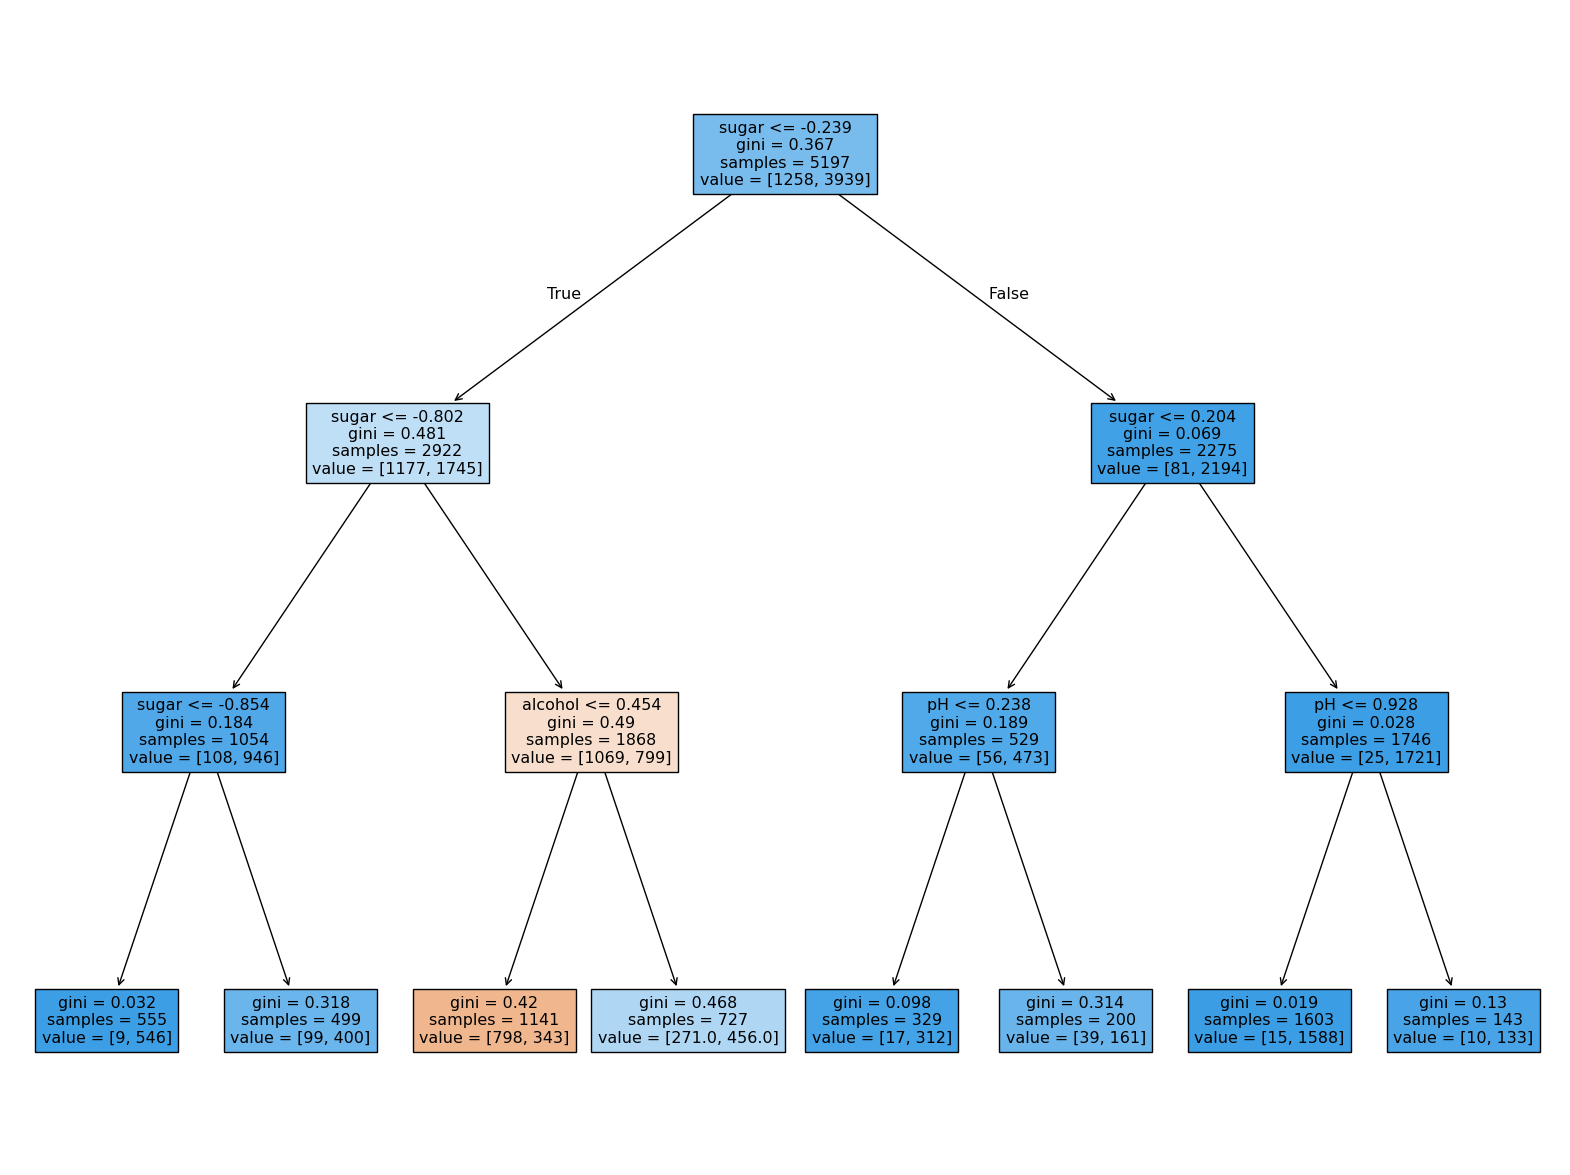

In [21]:
plt.figure(figsize = (20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
# 05-1
# 확인문제 Q4 _ max_depth를 3으로 지정하여 좌우가 대칭인 트리모델 만들기

In [22]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


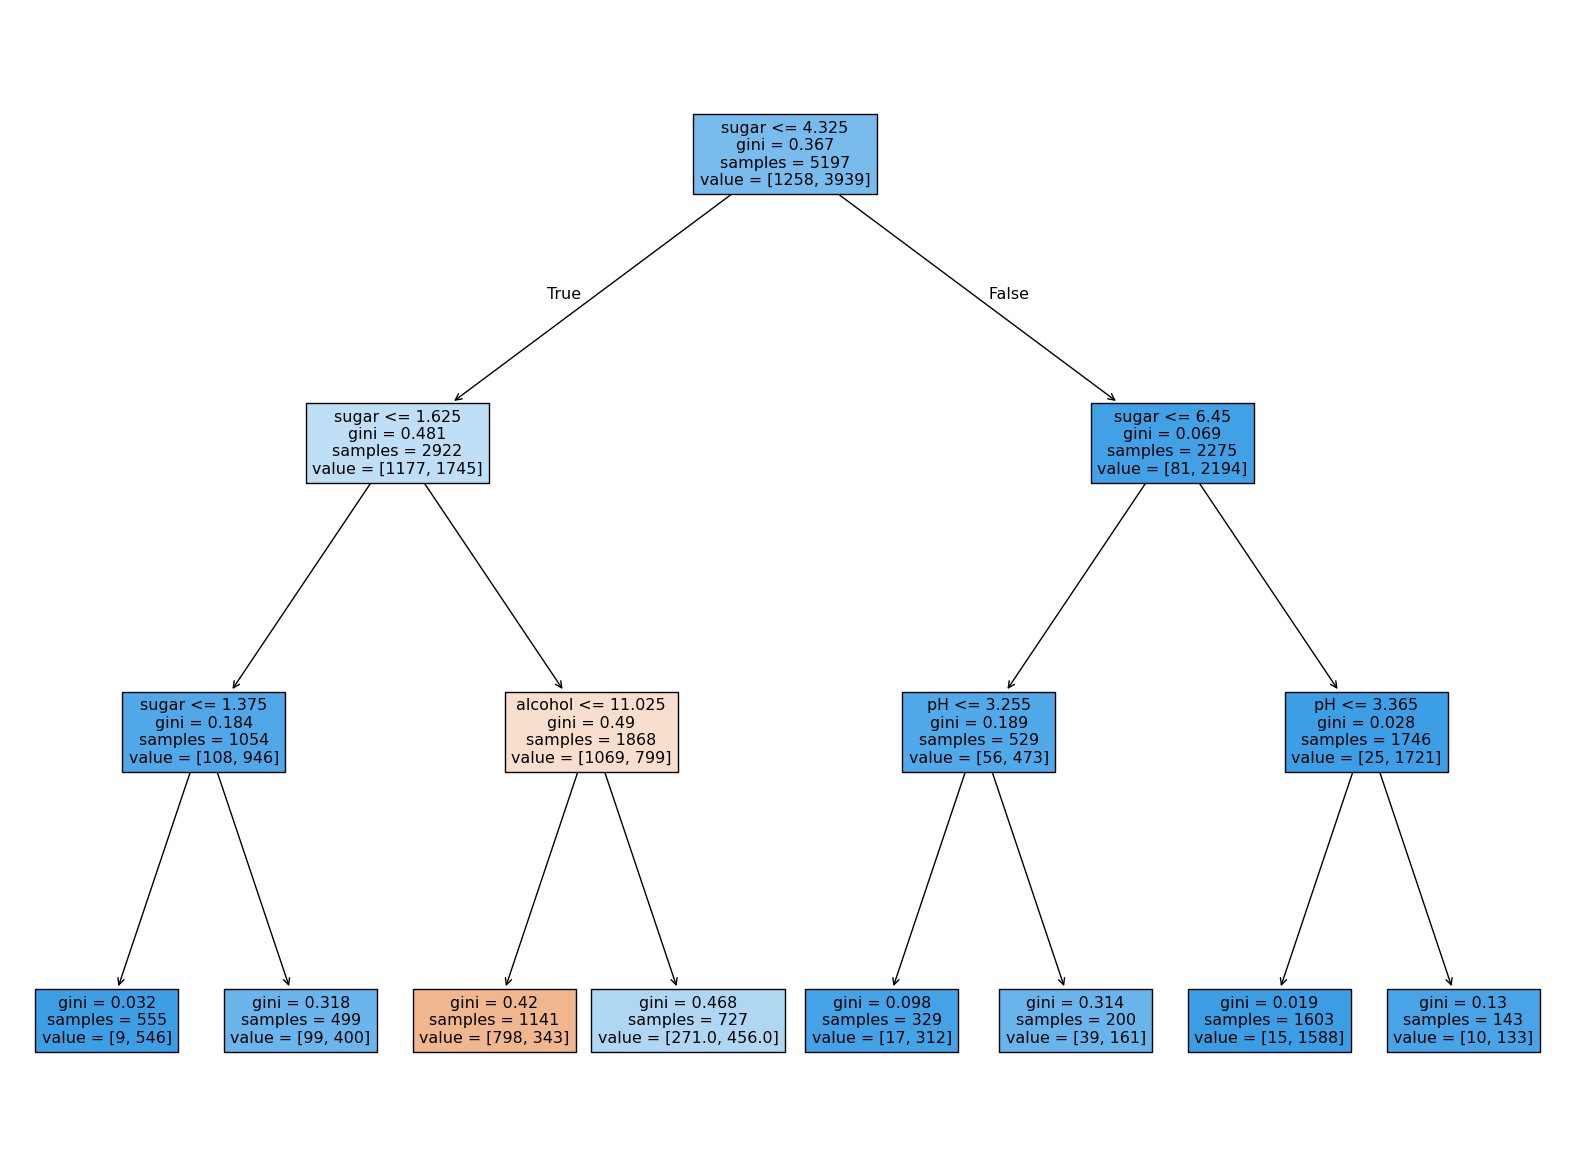

In [23]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [24]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


## 05-2. 교차 검증과 그리드 서치

In [25]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [27]:
target = wine['class']

In [28]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [30]:
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [31]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [32]:
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


In [33]:
# 교차 검증
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.0192132 , 0.0100162 , 0.01631093, 0.01046395, 0.00971317]), 'score_time': array([0.00668478, 0.003757  , 0.00238109, 0.00255036, 0.00344229]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [34]:
print(np.mean(scores['test_score']))

0.855300214703487


In [35]:
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [37]:
splitter = StratifiedKFold(n_splits=10, shuffle= True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


In [38]:
# 하이퍼파라미터 튜닝
params = {'min_impurity_decrease':[0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),params, n_jobs=-1)
gs.fit(train_input, train_target)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'min_impurity_decrease': [0.0001, 0.0002, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [39]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [40]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [41]:
print(gs.cv_results_['params'][gs.best_index_])
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1), 'min_samples_split': range(2, 100, 10) }

{'min_impurity_decrease': 0.0001}


In [42]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1) 
gs.fit(train_input, train_target)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': range(5, 20), 'min_impurity_decrease': array([0.0001... 0.0009]), 'min_samples_split': range(2, 100, 10)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [43]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': np.float64(0.0004), 'min_samples_split': 12}


In [46]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


In [47]:
# 랜덤 서치
rgen = randint(0,10)
rgen.rvs(10)

array([1, 5, 9, 9, 2, 3, 0, 9, 1, 9])

In [48]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 91,  92, 105,  95,  96, 109, 101, 101, 101, 109]))

In [49]:
ugen = uniform(0,1)
ugen.rvs(10)

array([0.66475389, 0.23669473, 0.58481905, 0.05204809, 0.29402816,
       0.56496002, 0.81831688, 0.54046034, 0.08201351, 0.14120824])

In [50]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20,50),
          'min_samples_split':randint(2,25),
          'min_samples_leaf': randint(1,25),}

In [51]:
rs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
rs.fit(train_input, train_target)

,estimator,DecisionTreeC...ndom_state=42)
,param_distributions,"{'max_depth': <scipy.stats....x7b3fb8cfe140>, 'min_impurity_decrease': <scipy.stats....x7b3fb9661600>, 'min_samples_leaf': <scipy.stats....x7b3fb8cfdf00>, 'min_samples_split': <scipy.stats....x7b3fb8cffbe0>}"
,n_iter,100
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [52]:
print(rs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': np.float64(0.00034102546602601173), 'min_samples_leaf': 7, 'min_samples_split': 13}


In [54]:
print(np.max(rs.cv_results_['mean_test_score']))

0.8695428296438884


In [56]:
dt = rs.best_estimator_
print(dt.score(test_input, test_target))

0.86


## 05-3. 트리의 앙상블

In [ ]:
# !pip install xgboost
# !pip install lightgbm

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import (
                                     train_test_split,
                                     cross_validate )
from sklearn.ensemble import (
                              RandomForestClassifier,
                              ExtraTreesClassifier,
                              GradientBoostingClassifier)
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier